# Task 0 - Alkemy

_Lorenzo Antolini, Enrico Grandi, Simone Lu, Enrico Romano_

 - data understanding;
 - data cleaning;
 - data visualization;
 - merging according to our business needs.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
df_cb = pd.read_csv("clicks_bidding.csv") 
df_cr = pd.read_csv("clicks_regular.csv") 
df_pr_co = pd.read_csv("prices_competitor.csv") 
df_pr_ca = pd.read_csv("product_catalog.csv") 
df_sd = pd.read_csv("sales_data.csv") 
df_sl = pd.read_csv("sellers_list.csv") 
df_st = pd.read_csv("stock.csv") 

# 1. Sales data

In [3]:
df_sd["profit"] = (df_sd["sales_price"]-df_sd["purchase_price"])
df_sd['revenue'] = (df_sd["sales_price"]*df_sd['quantity'])
df_sd['promotion_perc'] = ((df_sd["regular_price"] - df_sd["sales_price"]) / df_sd['regular_price'] * 100)
df_sd["month"] = [str(x)[5:7] for x in df_sd["sale_date"]]
                           
df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01
...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500,5484.0,25.780450,12
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12


In [4]:
#dtype tranformation
df_sd['sale_date'] = pd.to_datetime(df_sd['sale_date'])
df_sd['product_id'] = df_sd['product_id'].values.astype('str')


In [5]:
df_sd.describe()

,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc
count,119125.000000,119125.000000,119125.000000,119125.000000,119125.000000,119125.000000,119125.000000,1.191250e+05,119125.000000
mean,1.388063,15461.240504,19940.116399,12884.534783,16617.039524,11903.026049,981.508733,1.676675e+04,22.638284
std,1.345419,19568.124845,25160.648387,16306.679009,20967.062783,15368.225986,2471.513989,2.700397e+04,13.587307
min,1.000000,1.000000,1.000000,1.000000,0.833300,0.830000,-78626.915600,1.000000e+00,-171.854536
25%,1.000000,2499.000000,3332.000000,2082.000000,2776.851900,1795.708600,123.000000,2.443000e+03,10.018091
50%,1.000000,6666.000000,8878.000000,5555.000000,7398.148100,4948.160000,499.000000,6.816000e+03,19.999294
75%,1.000000,24545.000000,31100.000000,20454.000000,25916.666700,18800.000000,1388.227700,2.295600e+04,28.096643
max,70.000000,453303.000000,533322.000000,377752.000000,444435.185200,341595.892900,119638.206400,1.172800e+06,79.739534


In [6]:
# le uniche colonne che secondo me ha senso guardare se hanno outliers.
feature_list = ['sales_price','regular_price','purchase_price','profit']

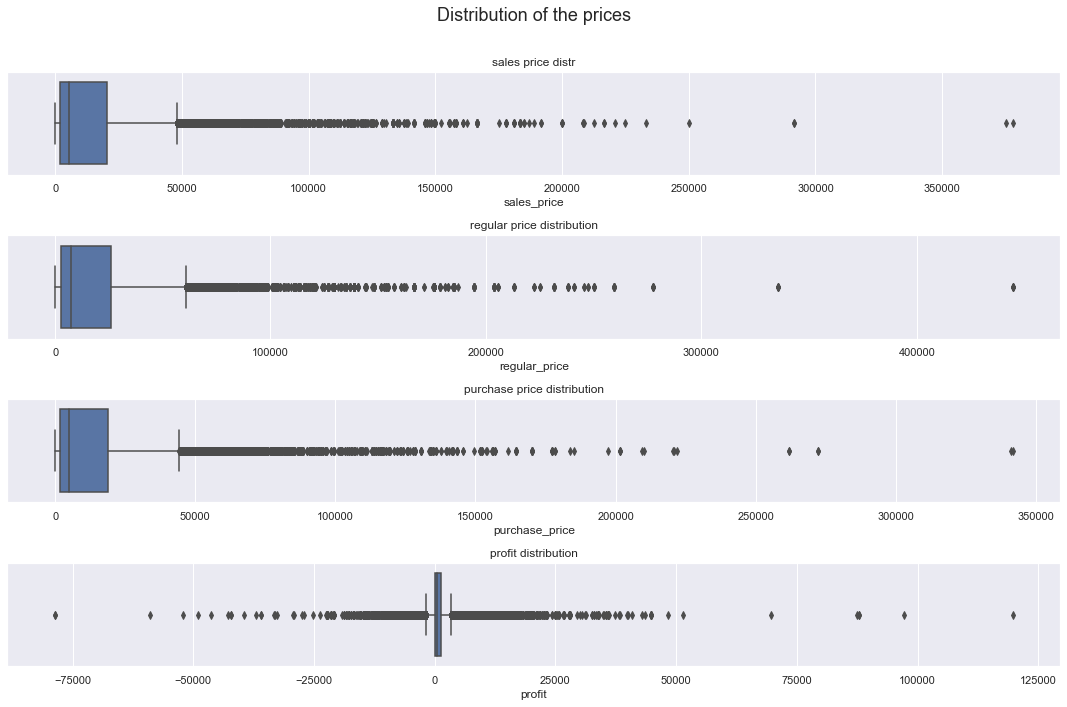

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
fig.suptitle('Distribution of the prices\n', size = 18)

sns.boxplot(df_sd['sales_price'], ax=axes[0])
axes[0].set_title("sales price distr");

sns.boxplot(df_sd['regular_price'], ax=axes[1])
axes[1].set_title("regular price distribution");

sns.boxplot(df_sd['purchase_price'], ax=axes[2])
axes[2].set_title("purchase price distribution");

sns.boxplot(df_sd['profit'], ax = axes[3])
axes[3].set_title("profit distribution");



plt.tight_layout()

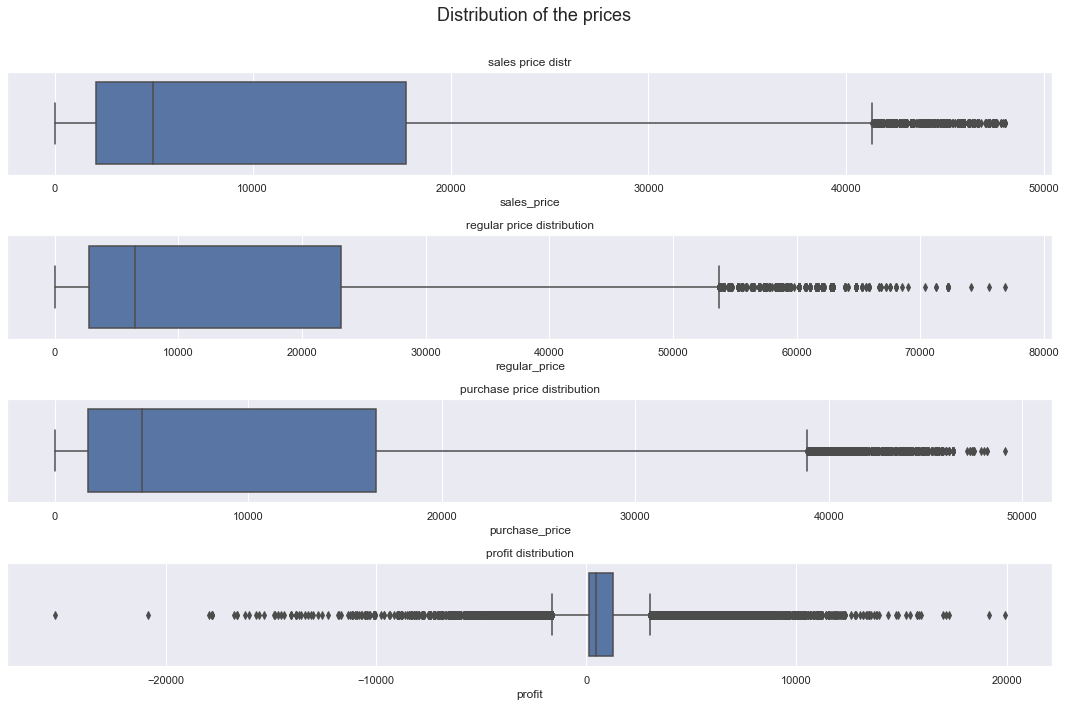

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
fig.suptitle('Distribution of the prices\n', size = 18)

sns.boxplot(df_out['sales_price'], ax=axes[0])
axes[0].set_title("sales price distr");

sns.boxplot(df_out['regular_price'], ax=axes[1])
axes[1].set_title("regular price distribution");

sns.boxplot(df_out['purchase_price'], ax=axes[2])
axes[2].set_title("purchase price distribution");

sns.boxplot(df_out['profit'], ax = axes[3])
axes[3].set_title("profit distribution");



plt.tight_layout()

# 2. Tukey's IQR method

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

In [8]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [9]:
Outliers_IQR = IQR_method(df_sd,1,feature_list)

Total number of outliers is: 14665


In [10]:
df_out = df_sd.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [11]:
# df_out.to_csv(r'C:\Users\enric\OneDrive\Desktop\Data Science and Management\II Anno\Big Data\project\sales_cleaned.csv', index=False, header=True)
# 

In [12]:
df_out.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01


<AxesSubplot:xlabel='sales_price'>

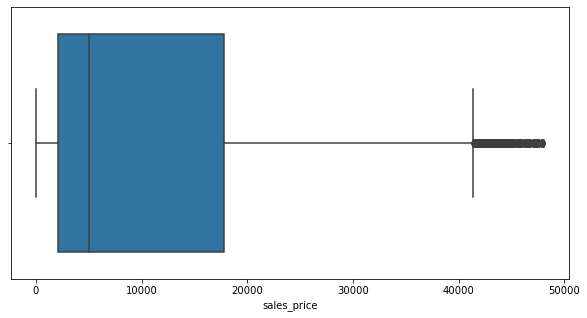

In [13]:
plt.figure(figsize = (10,5))
sns.boxplot(df_out['sales_price'])


### Analysis

In which month sellers sold the most?

In [14]:
df_sd.groupby('month').sum()

,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc
month,,,,,,,,,
01,9806,101425542.5,130285881.0,84521601.0,1.085723e+08,7.649826e+07,8.023337e+06,110811562.0,156868.732044
02,9819,113291244.5,147536403.0,94411972.5,1.229504e+08,8.655103e+07,7.860945e+06,114693503.5,174789.315569
03,19220,175189813.5,231028793.0,145993002.0,1.925262e+08,1.369154e+08,9.077601e+06,192912554.0,324912.214532
04,14154,147270239.0,189183998.0,122726285.5,1.576550e+08,1.127227e+08,1.000360e+07,155517514.5,226448.155975
05,10146,112185182.0,140590585.0,93489797.5,1.171616e+08,8.371588e+07,9.773915e+06,113959861.5,165205.495275
06,13615,152357041.5,196905112.0,126964195.0,1.640879e+08,1.187033e+08,8.260869e+06,174387020.0,218074.517778
07,14619,154243389.5,194738336.0,128535781.0,1.622820e+08,1.187635e+08,9.772258e+06,175036700.0,217230.342411
08,11941,167203867.5,210411067.0,139336576.0,1.753431e+08,1.306440e+08,8.692579e+06,165802588.5,210926.243720
09,12205,172263464.0,216474646.0,143557090.0,1.804012e+08,1.340302e+08,9.526894e+06,172683608.5,202553.335130


In [15]:
from matplotlib.pyplot import figure

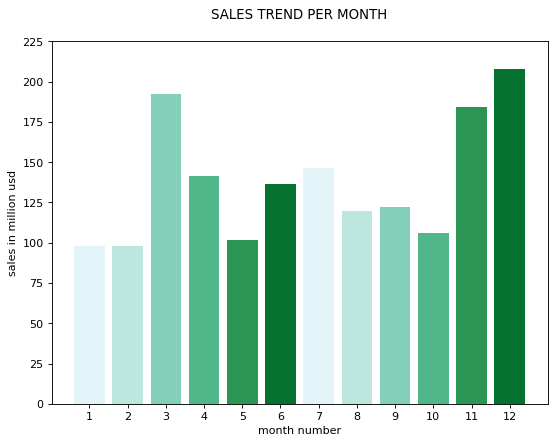

In [16]:
months = range(1,13)
figure(figsize=(8, 6), dpi=80)
results = df_sd.groupby('month').sum()
plt.bar(months, results['quantity'], color = sns.color_palette('BuGn'))
plt.xticks(months)
labels,location = plt.yticks()
plt.yticks(labels,(labels/100).astype(int))
plt.ylabel('sales in million usd')
plt.xlabel('month number')
plt.title("SALES TREND PER MONTH\n")
plt.show()

# which seller sold most products?

In [17]:
results3 = df_sd[['product_id','quantity']].groupby('product_id').sum()
results3 = results3["quantity"].sort_values(ascending=False)
results3

product_id
112582    649
110853    646
157318    541
125506    445
107645    441
         ... 
139933      4
139950      4
139967      4
139984      4
100043      4
Name: quantity, Length: 7529, dtype: int64

In [18]:
most_sold_prod = results3.to_frame().reset_index().head(10)

which products line generates most income ?
https://towardsdatascience.com/exploratory-data-analysis-using-spermarket-sales-data-in-python-e99d329a07fc Q8

[Text(0.5, 1.0, 'The top 10 best-selling products\n')]

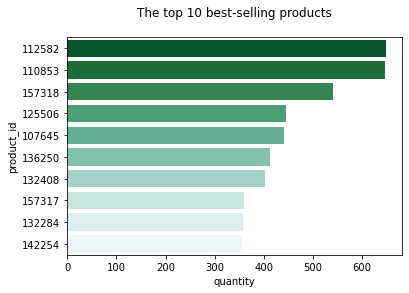

In [19]:
sns.barplot(x = 'quantity',y='product_id', data=most_sold_prod, palette= ('BuGn_r')).set(title='The top 10 best-selling products\n')

In [20]:
#most profitable 10 articles
results4 = df_sd[['product_id','profit']].groupby('product_id').sum()
results4 = results4["profit"].sort_values(ascending=False)
most_profit_prod = results4.to_frame().reset_index().head(10)

[Text(0.5, 1.0, 'The top 10 profitable products\n')]

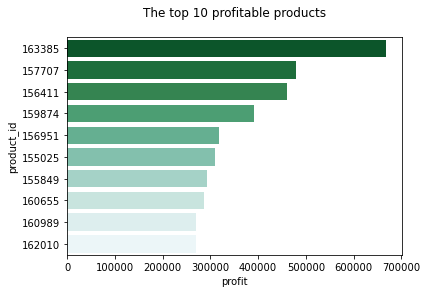

In [21]:
sns.barplot(x = 'profit',y='product_id', data=most_profit_prod,palette = ('BuGn_r')).set(title='The top 10 profitable products\n')

## 2 - Product Catalog

In [22]:
df_pr_ca.head(10)

,product_id,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
0,109844,1776,1504,732,367,1539
1,119374,1776,1504,732,367,1748
2,131012,1776,1504,1907,367,2849
3,131031,1776,1504,1907,367,2841
4,131306,1776,1504,1907,213,2745
5,131060,1776,1504,1907,367,3487
6,131061,1776,1504,1907,367,3488
7,141568,1776,1504,1907,513,3053
8,141570,1776,1504,1907,513,3244
9,141556,1776,1504,2183,513,3234


Let's see if there are some null values in product catalog

In [23]:
df_pr_ca.isnull().sum()

product_id     0
coded_cat1     0
coded_cat2     0
coded_cat3     0
coded_brand    0
coded_name     0
dtype: int64

Then, we did some plot to understand how much product belongs to a specific category.

<AxesSubplot:xlabel='coded_cat1', ylabel='count'>

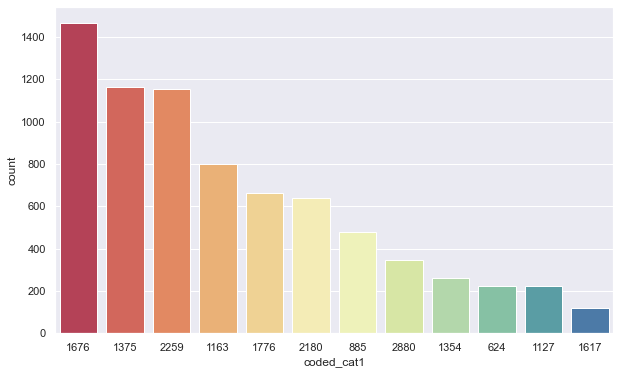

In [24]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data=df_pr_ca, x="coded_cat1", order = df_pr_ca['coded_cat1'].value_counts().index, palette = 'Spectral')

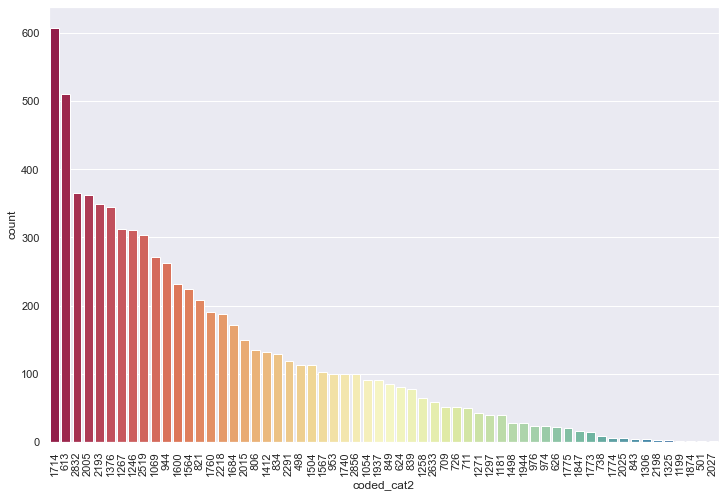

In [25]:
sns.set(rc={'figure.figsize':(12,8)})
g=sns.countplot(data=df_pr_ca, x="coded_cat2", order = df_pr_ca['coded_cat2'].value_counts().index, palette = 'Spectral')
_=g.set_xticklabels(g.get_xticklabels(), rotation=90)

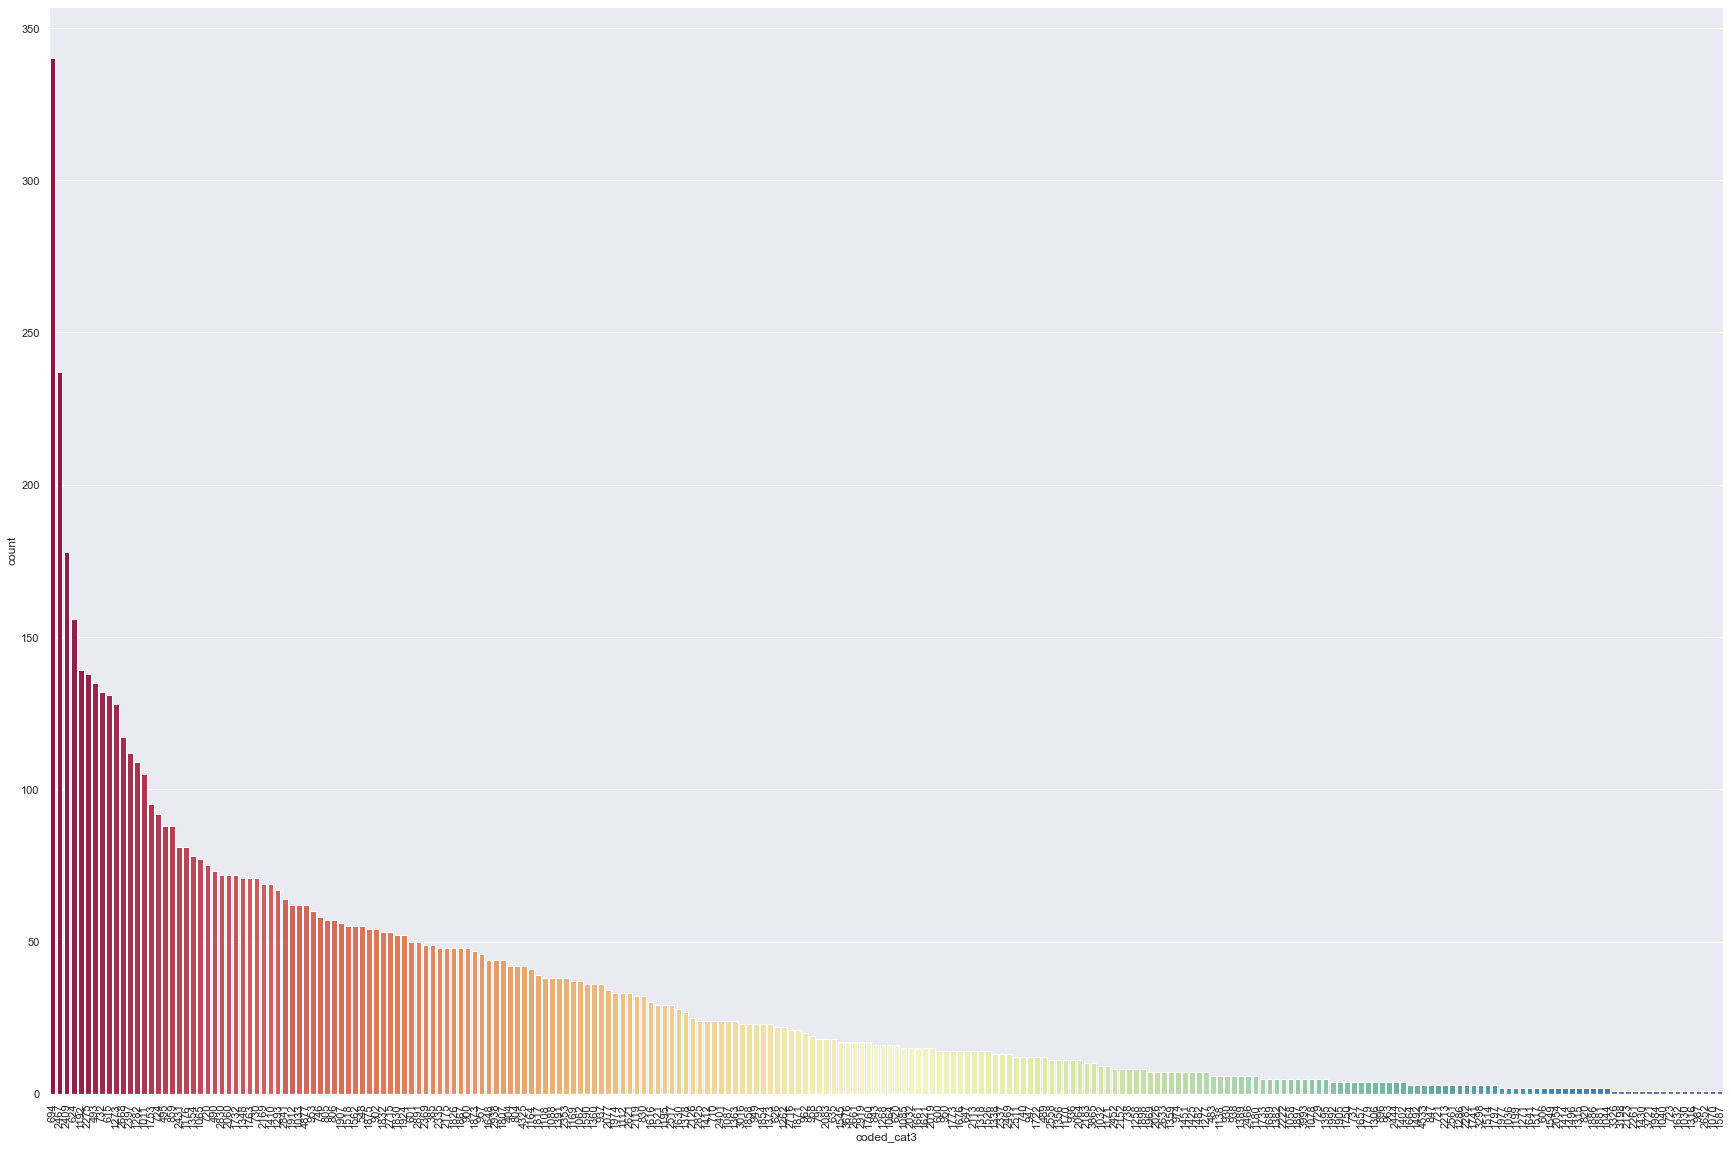

In [26]:
sns.set(rc={'figure.figsize':(30,20)})
f=sns.countplot(data=df_pr_ca, x="coded_cat3", order = df_pr_ca['coded_cat3'].value_counts().index, palette = 'Spectral')
_=f.set_xticklabels(f.get_xticklabels(), rotation=90)

 ## 3 - Stock

In [27]:
df_st.head()

,stock_date,product_id,total_stock
0,2021-09-14,136195,12
1,2021-12-15,121479,4
2,2021-02-18,133076,52
3,2021-04-10,160615,20
4,2021-08-24,100204,24


In [28]:
df_st.isnull().sum()

stock_date     0
product_id     0
total_stock    0
dtype: int64

In [29]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289730 entries, 0 to 2289729
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   stock_date   object
 1   product_id   int64 
 2   total_stock  int64 
dtypes: int64(2), object(1)
memory usage: 52.4+ MB


## 4 - Prices Competitor

In [30]:
df_pr_co

,comp_date,seller_id,product_id,price
0,2021-01-01,23,110064,27990
1,2021-01-01,24,110064,27990
2,2021-01-01,26,110064,27990
3,2021-01-01,41,110064,27490
4,2021-01-01,48,110064,27990
...,...,...,...,...
8473031,2021-12-31,24,163535,19990
8473032,2021-12-31,24,172307,14649
8473033,2021-12-31,26,172307,12207
8473034,2021-12-31,41,164799,19798


<AxesSubplot:xlabel='price'>

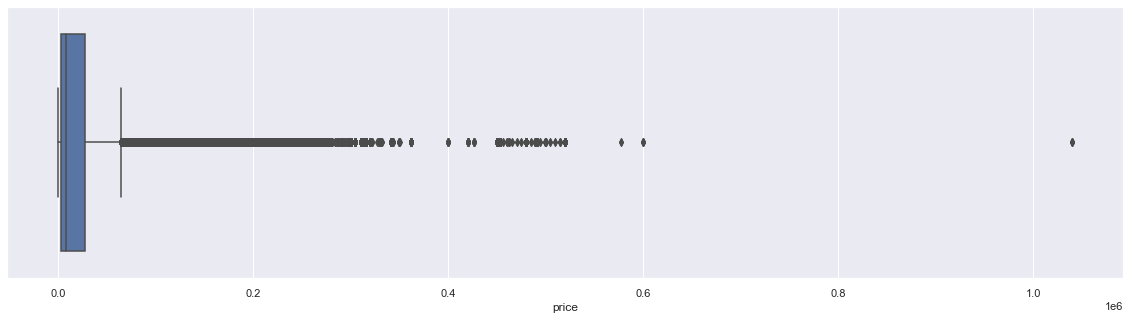

In [31]:
#define figure size
sns.set(rc={"figure.figsize":(20, 5)}) #width=6, height=5
sns.boxplot(df_pr_co['price'])

In [32]:
feature_list_1 = ['price']

In [33]:
Outliers_IQR_1 = IQR_method(df_pr_co,0,feature_list_1)

Total number of outliers is: 392755


In [33]:
df_pr_co = df_pr_co.drop(Outliers_IQR_1, axis = 0).reset_index(drop=True)

<AxesSubplot:xlabel='price'>

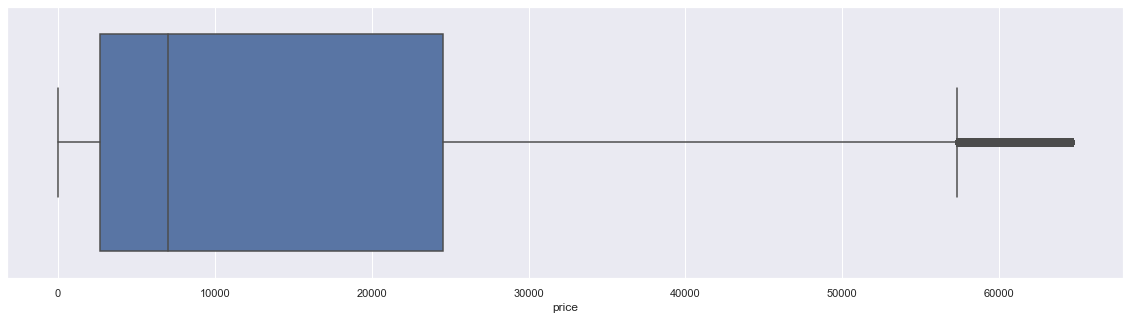

In [34]:
#define figure size
sns.set(rc={"figure.figsize":(20, 5)}) #width=6, height=5
sns.boxplot(df_pr_co['price'])

In [35]:
df_pr_co

,comp_date,seller_id,product_id,price
0,2021-01-01,23,110064,27990
1,2021-01-01,24,110064,27990
2,2021-01-01,26,110064,27990
3,2021-01-01,41,110064,27490
4,2021-01-01,48,110064,27990
...,...,...,...,...
8080276,2021-12-31,24,163535,19990
8080277,2021-12-31,24,172307,14649
8080278,2021-12-31,26,172307,12207
8080279,2021-12-31,41,164799,19798


#### Merge stock + sales data + prod catalog

In [36]:
df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01
...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500,5484.0,25.780450,12
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12


In [37]:
df_st['product_id'] = df_st['product_id'].values.astype('str')
df_st['stock_date'] = pd.to_datetime(df_st['stock_date'])
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289730 entries, 0 to 2289729
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   stock_date   datetime64[ns]
 1   product_id   object        
 2   total_stock  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 52.4+ MB


In [38]:
df_merged_2=pd.merge(df_sd,df_st, how='left', left_on = ['sale_date','product_id'],right_on = ['stock_date','product_id'])

In [39]:
df_merged_2

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month,stock_date,total_stock
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01,2021-01-02,12.0
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01,2021-01-02,302.0
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01,2021-01-02,50.0
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01,2021-01-02,54.0
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01,2021-01-02,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500,5484.0,25.780450,12,2021-12-31,79.0
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12,2021-12-31,30.0
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12,2021-12-31,106.0
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12,NaT,NaN


In [40]:
#questo ci fa capire di piu sui prodotti venduti dal seller 24
df_pr_ca['product_id'] = df_pr_ca['product_id'].astype('str')
df_merged_2 = pd.merge(df_merged_2, df_pr_ca,  how='left', on = ['product_id'])
df_merged_2

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month,stock_date,total_stock,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01,2021-01-02,12.0,2180,613,732,691,1823
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01,2021-01-02,302.0,2259,2015,493,522,1709
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01,2021-01-02,50.0,2259,1714,724,253,1435
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01,2021-01-02,54.0,2180,613,732,691,2117
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01,2021-01-02,10.0,2180,613,2275,691,2820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500,5484.0,25.780450,12,2021-12-31,79.0,1776,1376,694,731,2279
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12,2021-12-31,30.0,1776,1376,694,576,2606
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12,2021-12-31,106.0,1375,2519,2668,455,3045
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12,NaT,NaN,1354,1498,1854,516,3512


<b>finding</b>: the stock level does not match with the online sales. Why? physical stores. Also after merging we found 800 null values in stock's columns

## 5- Clicks bidding

In [41]:
df_cb.head()

,date,seller,position,price_max,price_min,price,type,product_id
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375


In [42]:
df_cb.describe()

,seller,position,price_max,price_min,price,product_id
count,696999.000000,696999.000000,696999.00000,696999.000000,6.969990e+05,696999.000000
mean,89.491090,1.642078,31544.67704,26941.502857,2.664780e+04,147372.957950
std,139.562494,0.744681,30878.14769,26648.307314,2.678363e+04,17407.863938
min,23.000000,1.000000,0.00000,0.000000,0.000000e+00,100043.000000
25%,24.000000,1.000000,8990.00000,6873.000000,6.990000e+03,135241.000000
50%,26.000000,1.000000,24990.00000,21089.000000,2.099000e+04,153555.000000
75%,41.000000,2.000000,42990.00000,37498.000000,3.679000e+04,160534.000000
max,490.000000,3.000000,479990.00000,399990.000000,1.040290e+06,184913.000000


There aren't strange values, so let's move on

In [43]:
df_cb[(df_cb['price']==0)] # always the same product, maybe is better to remove it

,date,seller,position,price_max,price_min,price,type,product_id
121009,2021-06-01 06:53:08,490,1,1827.0,1190.0,0.0,Bidding,128791
121100,2021-06-01 08:25:46,490,1,7790.0,5129.0,0.0,Bidding,142964
121158,2021-06-01 08:59:38,490,1,1827.0,1190.0,0.0,Bidding,128791


checking for NaN values

In [44]:
df_cb.isnull().sum()

date          0
seller        0
position      0
price_max     0
price_min     0
price         0
type          0
product_id    0
dtype: int64

Text(0.5, 1.0, 'seller 23')

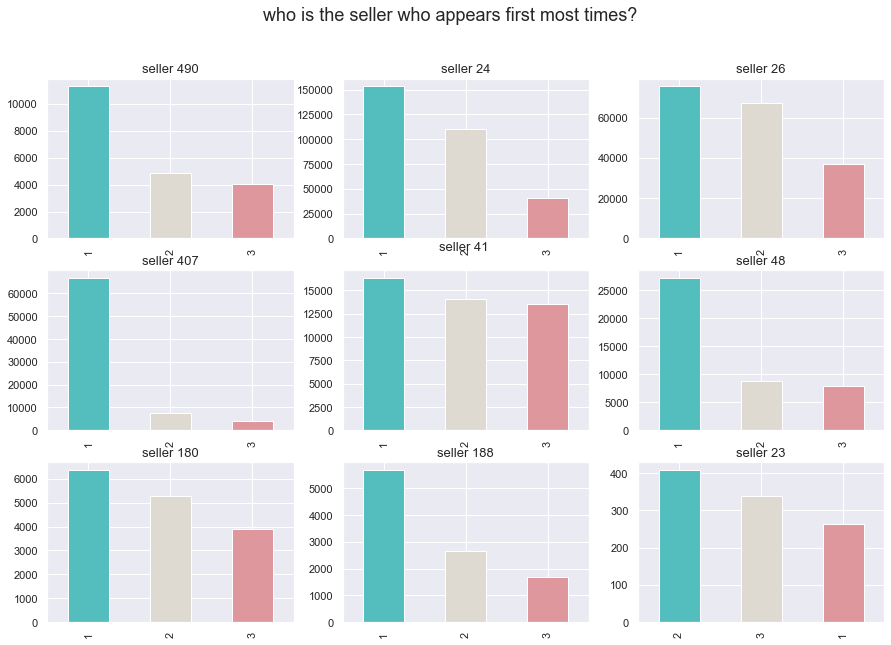

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
fig.suptitle('who is the seller who appears first most times? \n', size = 18)

seler490 = df_cb[(df_cb["seller"]==490)]['position'].value_counts()
seler490.plot(kind="bar",ax=axes[0,0], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 490',size=13)



seller24 = df_cb[(df_cb["seller"]==24)]['position'].value_counts()
seller24.plot(kind="bar",ax=axes[0,1], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 24',size=13)

seller26 = df_cb[(df_cb["seller"]==26)]['position'].value_counts()
seller26.plot(kind="bar",ax=axes[0,2], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 26',size=13)

seller407 = df_cb[(df_cb["seller"]==407)]['position'].value_counts()
seller407.plot(kind="bar",ax=axes[1,0], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 407',size=13)

seller41 = df_cb[(df_cb["seller"]==41)]['position'].value_counts()
seller41.plot(kind="bar",ax=axes[1,1], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 41',size=13)
             
seller48 = df_cb[(df_cb["seller"]==48)]['position'].value_counts()
seller48.plot(kind="bar",ax=axes[1,2], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 48',size=13)

seller180 = df_cb[(df_cb["seller"]==180)]['position'].value_counts()
seller180.plot(kind="bar",ax=axes[2,0], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 180',size=13)

seller188 = df_cb[(df_cb["seller"]==188)]['position'].value_counts()
seller188.plot(kind="bar",ax=axes[2,1], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 188',size=13)

seller23 = df_cb[(df_cb["seller"]==23)]['position'].value_counts()
seller23.plot(kind="bar",ax=axes[2,2], color = ["#54bebe", "#dedad2", "#df979e"]).set_title('seller 23',size=13)

So, sellers that appears most time as first in the research are sellers 407 and 26, followed by sellers 48 and 24 (our client)

## 6- Click Regular 

In [46]:
df_cr.head()

,date,seller,position,price_max,price_min,price,type,product_id
0,2020-01-01 00:28:01,48,NaN,5290.0,5290.0,NaN,Regular,148875
1,2020-01-01 00:29:40,48,NaN,11787.0,9990.0,NaN,Regular,104538
2,2020-01-01 00:30:39,23,NaN,16217.0,16217.0,NaN,Regular,108283
3,2020-01-01 00:42:23,48,NaN,7399.0,6398.0,NaN,Regular,144718
4,2020-01-01 00:42:51,407,NaN,3343.0,2299.0,NaN,Regular,144776


In [47]:
df_cr.isnull().sum() * 100 / len(df_cr)

date           0.000000
seller         0.000000
position      48.544052
price_max      0.000000
price_min      0.000000
price         48.525410
type           0.000000
product_id     0.000000
dtype: float64

In [48]:
df_cr.describe()

,seller,position,price_max,price_min,price,product_id
count,2.252931e+06,1.159267e+06,2.252931e+06,2.252931e+06,1.159687e+06,2.252931e+06
mean,1.046320e+02,3.250272e+00,2.867170e+04,2.477529e+04,2.588969e+04,1.417800e+05
std,1.212329e+02,6.969543e+00,2.921498e+04,2.561004e+04,2.618595e+04,1.737381e+04
min,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000430e+05
25%,2.400000e+01,1.000000e+00,7.033000e+03,5.698000e+03,6.299000e+03,1.304940e+05
50%,4.100000e+01,2.000000e+00,2.099000e+04,1.799000e+04,1.979900e+04,1.437320e+05
75%,1.800000e+02,4.000000e+00,3.999900e+04,3.508900e+04,3.670800e+04,1.559420e+05
max,4.900000e+02,1.026000e+03,4.799900e+05,3.999900e+05,1.040290e+06,1.849130e+05


We can notice some extreme values in the position. It is really strange that a product should have a position 1.026000e+03!

Let's proceed with a cleaning. For this analyis, we should consider only product with a position <15 and, of course, >0

In [49]:
df_cr_filtered = df_cr[(df_cr['position']<=15) & (df_cr['position']>0)]

In [50]:
df_cr_filtered['position'].value_counts()

1.0     464839
2.0     228416
3.0     143204
4.0      82809
5.0      56029
6.0      40207
7.0      30517
8.0      23588
9.0      18110
10.0     14537
11.0     11639
12.0      9476
13.0      7561
14.0      5985
15.0      4882
Name: position, dtype: int64

In [51]:
df_cr_filtered.shape

(1141799, 8)

By removing value position higher than 15 and lower than 0, we removed also all the NaN values from the dataset.

In [52]:
df_cr_filtered.isnull().sum()

date          0
seller        0
position      0
price_max     0
price_min     0
price         0
type          0
product_id    0
dtype: int64

In [53]:
# df_cr_filtered.to_csv(r'C:\Users\enric\OneDrive\Desktop\Data Science and Management\II Anno\Big Data\project\clicksreg_cleaned.csv', index=False, header=True)

# Merging Datasets according to our business needs

Our first task is to identify leaders and followers. To perform this task, we need to merge the product_catalog and price_competitor datasets.

In [54]:
df_pr_ca['product_id'] = df_pr_ca['product_id'].values.astype('str')
df_pr_co['product_id'] = df_pr_co['product_id'].values.astype('str')

In [55]:
df_merged = pd.merge(df_pr_co, df_pr_ca, how='left', on = ['product_id'])

In [56]:
df_merged.head()

,comp_date,seller_id,product_id,price,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
0,2021-01-01,23,110064,27990,1676,2193,2891,522,2662
1,2021-01-01,24,110064,27990,1676,2193,2891,522,2662
2,2021-01-01,26,110064,27990,1676,2193,2891,522,2662
3,2021-01-01,41,110064,27490,1676,2193,2891,522,2662
4,2021-01-01,48,110064,27990,1676,2193,2891,522,2662


This dataset will be reused in Task 1

Our second business need is to create a popularity index for our products. For this purpose, it is essential to use the following datasets: 

In [57]:
df_out

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01
...,...,...,...,...,...,...,...,...,...,...,...,...
114009,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500,5484.0,25.780450,12
114010,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000,1658.0,30.863319,12
114011,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000,4158.0,10.007215,12
114012,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000,2158.0,10.013898,12


In [58]:
df_sd_count = df_out.groupby(['product_id','sale_date'])['quantity'].sum()
df_sd_count = df_sd_count.to_frame(name= 'sales_count_xproduct').reset_index()
df_sd_count

,product_id,sale_date,sales_count_xproduct
0,100043,2021-01-22,1
1,100043,2021-03-17,1
2,100043,2021-03-31,1
3,100043,2021-12-31,1
4,100044,2021-02-08,1
...,...,...,...
114009,184860,2021-12-23,1
114010,184860,2021-12-24,2
114011,184860,2021-12-27,6
114012,184860,2021-12-28,2


In [59]:
df_out['sales_xproduct'] = df_sd_count['sales_count_xproduct']
df_out.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,month,sales_xproduct
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000,2082.0,10.021718,01,1
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000,3325.0,52.056075,01,1
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000,1907.0,39.246018,01,1
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976,4158.0,25.143524,01,1
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000,4992.0,22.969600,01,1


In [60]:
df_cr_filtered.head()

,date,seller,position,price_max,price_min,price,type,product_id
1092142,2021-01-18 15:09:59,26,1.0,3290.0,2299.0,2325.0,Regular,157369
1092143,2021-01-18 15:10:23,180,6.0,29990.0,29230.0,26999.0,Regular,142052
1092144,2021-01-18 15:10:34,24,8.0,3690.0,2578.0,2990.0,Regular,149376
1092145,2021-01-18 15:11:26,41,1.0,32990.0,30690.0,26990.0,Regular,157209
1092146,2021-01-18 15:11:36,41,2.0,41889.0,34779.0,32800.0,Regular,154206


In [61]:
df_cr_filtered['date'] = pd.to_datetime(df_cr_filtered['date']).dt.strftime('%Y-%m-%d')

In [62]:
df_cr_filtered.rename(columns = {'date':'click_date'}, inplace = True)

For popularity index, it's necessary to consider only our client (24), because we want to know the popularity of the product that we sell. 

In [63]:
df_cr_24 = df_cr_filtered[(df_cr_filtered['seller']==24)]

In [64]:
df_cr_24['product_id'] = df_cr_24['product_id'].values.astype('str')

In [65]:
prod_cb_count = df_cr_24.groupby(['product_id','click_date']).size()
prod_cb_count = prod_cb_count.to_frame(name= "click_count").reset_index()
prod_cb_count

,product_id,click_date,click_count
0,100043,2021-02-22,1
1,100052,2021-02-06,2
2,100078,2021-01-20,2
3,100078,2021-01-21,1
4,100078,2021-10-30,1
...,...,...,...
163049,184596,2021-12-30,1
163050,184749,2021-12-07,1
163051,184749,2021-12-21,1
163052,184809,2021-12-17,2


In [66]:
df_cr_24 = pd.merge(df_cr_24,prod_cb_count, how='left', on = ['product_id','click_date'])

In [67]:
df_cr_24

,click_date,seller,position,price_max,price_min,price,type,product_id,click_count
0,2021-01-18,24,8.0,3690.0,2578.0,2990.0,Regular,149376,1
1,2021-01-18,24,9.0,50999.0,39990.0,38990.0,Regular,152717,1
2,2021-01-18,24,1.0,3490.0,2290.0,2290.0,Regular,121907,3
3,2021-01-18,24,2.0,2890.0,1849.0,1999.0,Regular,108941,1
4,2021-01-18,24,3.0,43990.0,36890.0,43990.0,Regular,157345,1
...,...,...,...,...,...,...,...,...,...
292646,2022-01-04,24,1.0,45499.0,45499.0,45499.0,Regular,156411,1
292647,2022-01-04,24,15.0,23990.0,18799.0,23990.0,Regular,177918,1
292648,2022-01-04,24,3.0,23500.0,22990.0,22990.0,Regular,140204,1
292649,2022-01-04,24,2.0,29990.0,29990.0,29990.0,Regular,157704,2


In [68]:
df_cr_24copy = df_cr_24.copy()

In [69]:
df_cr_24copy.drop(['price','price_min','price_max'],axis=1,inplace=True)

In [70]:
df_cr_24copy.head()

,click_date,seller,position,type,product_id,click_count
0,2021-01-18,24,8.0,Regular,149376,1
1,2021-01-18,24,9.0,Regular,152717,1
2,2021-01-18,24,1.0,Regular,121907,3
3,2021-01-18,24,2.0,Regular,108941,1
4,2021-01-18,24,3.0,Regular,157345,1


In [71]:
df_cb.head()

,date,seller,position,price_max,price_min,price,type,product_id
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375


In [72]:
df_cb['date'] = pd.to_datetime(df_cb['date']).dt.strftime('%Y-%m-%d')

In [73]:
df_cb.rename(columns = {'date':'click_date'}, inplace = True)

In [74]:
df_cb_24 = df_cb[(df_cb['seller']==24)]

In [75]:
prod_clicksb_count = df_cb_24.groupby(['product_id','click_date']).size()
prod_clicksb_count = prod_clicksb_count.to_frame(name= "click_count").reset_index()
prod_clicksb_count

,product_id,click_date,click_count
0,100078,2021-12-06,1
1,100083,2021-05-02,1
2,100115,2021-11-08,1
3,100115,2021-11-23,1
4,100115,2021-11-25,1
...,...,...,...
173027,184749,2021-12-30,1
173028,184749,2021-12-31,2
173029,184809,2021-12-15,1
173030,184809,2021-12-16,1


In [76]:
df_cb_24 = pd.merge(df_cb_24,prod_clicksb_count, how='left', on = ['product_id','click_date'])
df_cb_24

,click_date,seller,position,price_max,price_min,price,type,product_id,click_count
0,2021-04-02,24,1,53990.0,48789.0,38790.0,Bidding,157285,6
1,2021-04-02,24,1,67199.0,67199.0,55990.0,Bidding,151375,1
2,2021-04-02,24,1,96990.0,72499.0,69990.0,Bidding,152248,2
3,2021-04-02,24,1,120390.0,5990.0,13990.0,Bidding,122363,1
4,2021-04-02,24,1,2899.0,2090.0,2749.0,Bidding,134825,4
...,...,...,...,...,...,...,...,...,...
304327,2022-01-04,24,2,42999.0,34689.0,41553.0,Bidding,154237,1
304328,2022-01-04,24,1,40790.0,38990.0,38990.0,Bidding,163284,1
304329,2022-01-04,24,1,10490.0,7990.0,8741.0,Bidding,165998,3
304330,2022-01-04,24,1,34990.0,32987.0,34990.0,Bidding,140183,2


In [77]:
df_cb_24copy = df_cb_24.copy()

In [78]:
df_cb_24copy.drop(['price','price_min','price_max'],axis=1,inplace=True)

In [79]:
df_cb_24copy.head()

,click_date,seller,position,type,product_id,click_count
0,2021-04-02,24,1,Bidding,157285,6
1,2021-04-02,24,1,Bidding,151375,1
2,2021-04-02,24,1,Bidding,152248,2
3,2021-04-02,24,1,Bidding,122363,1
4,2021-04-02,24,1,Bidding,134825,4


## Merging of click regular and sales data

Let's merge the datasets

In [80]:
df_task2 =  pd.merge(df_out, df_pr_ca, how='left', on = ['product_id'])

In [81]:
df_task2['sale_date'] = pd.to_datetime(df_task2['sale_date']).dt.strftime('%Y-%m-%d')

In [82]:
df_task2 = df_task2.set_index('product_id')
df_cr_24copy = df_cr_24copy.set_index('product_id')

In [83]:
df_task2_cr = df_task2.join(df_cr_24copy)

In [84]:
df_task2_cr.isnull().sum() * 100 / len(df_task2_cr)

sale_date            0.000000
quantity             0.000000
sales_price_tax      0.000000
regular_price_tax    0.000000
sales_price          0.000000
regular_price        0.000000
purchase_price       0.000000
profit               0.000000
revenue              0.000000
promotion_perc       0.000000
month                0.000000
sales_xproduct       0.000000
coded_cat1           0.000000
coded_cat2           0.000000
coded_cat3           0.000000
coded_brand          0.000000
coded_name           0.000000
click_date           0.198645
seller               0.198645
position             0.198645
type                 0.198645
click_count          0.198645
dtype: float64

Since the missing values represent only 0.19% of our dataset, the best thing to do, <b> in this case </b>, is to drop them

In [85]:
df_task2_cr = df_task2_cr.dropna(axis=0)

In [86]:
df_task2_cr.head()

,sale_date,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,...,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,click_date,seller,position,type,click_count
product_id,,,,,,,,,,,,,,,,,,,,,
100043,2021-01-22,1,459.0,510.0,382.0,425.0000,270.000,112.000,382.0,10.117647,...,1375,1760,1348,427,2301,2021-02-22,24.0,1.0,Regular,1.0
100043,2021-03-17,1,459.0,510.0,382.0,425.0000,270.000,112.000,382.0,10.117647,...,1375,1760,1348,427,2301,2021-02-22,24.0,1.0,Regular,1.0
100043,2021-03-31,1,459.0,510.0,382.0,425.0000,270.000,112.000,382.0,10.117647,...,1375,1760,1348,427,2301,2021-02-22,24.0,1.0,Regular,1.0
100043,2021-12-31,1,490.0,544.0,408.0,453.7037,270.000,138.000,408.0,10.073469,...,1375,1760,1348,427,2301,2021-02-22,24.0,1.0,Regular,1.0
100052,2021-05-28,2,377.0,443.0,314.0,369.4444,114.325,199.675,628.0,15.007509,...,1375,1564,1912,427,1629,2021-02-06,24.0,1.0,Regular,2.0


## Merging of click bidding and sales data

In [87]:
df_cb_24copy['product_id'] = df_cb_24copy['product_id'].values.astype('str')

In [88]:
df_cb_24copy = df_cb_24copy.set_index('product_id')

In [89]:
df_cb_24copy.shape

(304332, 5)

In [90]:
df_task2.shape

(114014, 17)

In [91]:
df_task2_cb = pd.merge(df_task2,df_cb_24copy, how='inner', left_on = ['sale_date','product_id'],right_on = ['click_date','product_id'])

In [92]:
# df_task2_cb = df_cb_24copy.join(df_task2)

In [93]:
df_task2_cb.isnull().sum() * 100 / len(df_task2_cb)

sale_date            0.0
quantity             0.0
sales_price_tax      0.0
regular_price_tax    0.0
sales_price          0.0
regular_price        0.0
purchase_price       0.0
profit               0.0
revenue              0.0
promotion_perc       0.0
month                0.0
sales_xproduct       0.0
coded_cat1           0.0
coded_cat2           0.0
coded_cat3           0.0
coded_brand          0.0
coded_name           0.0
click_date           0.0
seller               0.0
position             0.0
type                 0.0
click_count          0.0
dtype: float64

In [94]:
df_task2_cb

,sale_date,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit,revenue,promotion_perc,...,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,click_date,seller,position,type,click_count
product_id,,,,,,,,,,,,,,,,,,,,,
103499,2021-04-02,1,24880.0,32211.0,20733.0,26842.5926,17073.2051,3659.7949,20733.0,22.760814,...,1676,2832,1273,704,2685,2021-04-02,24,2,Bidding,2
103499,2021-04-02,1,24880.0,32211.0,20733.0,26842.5926,17073.2051,3659.7949,20733.0,22.760814,...,1676,2832,1273,704,2685,2021-04-02,24,1,Bidding,2
104028,2021-04-02,1,3528.0,8878.0,2940.0,7398.1481,4200.0000,-1260.0000,2940.0,60.260325,...,2180,834,3016,453,2554,2021-04-02,24,1,Bidding,1
105942,2021-04-02,1,4490.0,6100.0,3742.0,5083.3333,2800.0000,942.0000,3742.0,26.386885,...,2180,834,1088,453,1612,2021-04-02,24,1,Bidding,1
107591,2021-04-02,1,7990.0,12211.0,6658.0,10175.9259,5415.2000,1242.8000,6658.0,34.571064,...,2259,1714,949,522,2144,2021-04-02,24,2,Bidding,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183271,2021-12-31,1,29990.0,44433.0,24992.0,37027.7778,17381.0275,7610.9725,24992.0,32.504726,...,624,1567,1293,628,2340,2021-12-31,24,1,Bidding,3
183562,2021-12-31,2,3990.0,6656.0,3325.0,5546.2963,2465.1823,859.8177,6650.0,40.050084,...,1776,1504,2083,521,3086,2021-12-31,24,2,Bidding,2
183562,2021-12-31,2,3990.0,6656.0,3325.0,5546.2963,2465.1823,859.8177,6650.0,40.050084,...,1776,1504,2083,521,3086,2021-12-31,24,2,Bidding,2


In [95]:
df_task2_cr = df_task2_cr.reset_index()

In [96]:
df_task2_cb = df_task2_cb.reset_index()

In [97]:
#df_task2_cr.to_csv(r'C:\Users\enric\OneDrive\Desktop\Data Science and Management\II Anno\Big Data\project\clicksreg_merged.csv',
                      index=False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\enric\\OneDrive\\Desktop\\Data Science and Management\\II Anno\\Big Data\\project\\clicksreg_merged.csv'

In [ ]:
#df_task2_cb.to_csv(r'C:\Users\enric\OneDrive\Desktop\Data Science and Management\II Anno\Big Data\project\clicksbid_merged.csv',
                      index=False, header=True)